### Employee Attrition Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/GUVI/project3/Employee-Attrition - Employee-Attrition.csv")  
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


#### Data preprocessing and cleaning

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['EmployeeNumber'].duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [15]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [16]:
df['StandardHours'].unique()

array([80])

In [17]:
df['StandardHours'].value_counts()        

StandardHours
80    1470
Name: count, dtype: int64

In [18]:
# List of constant or irrelevant columns
cols_to_drop = ['EmployeeNumber', 'Over18',  'EmployeeCount', 'StandardHours']

# Drop them from the DataFrame
df = df.drop(columns=cols_to_drop)

# Confirm they are dropped
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [19]:
df.shape

(1470, 31)

#### EDA

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))
print("Count:", len(numerical_cols))


Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Count: 23


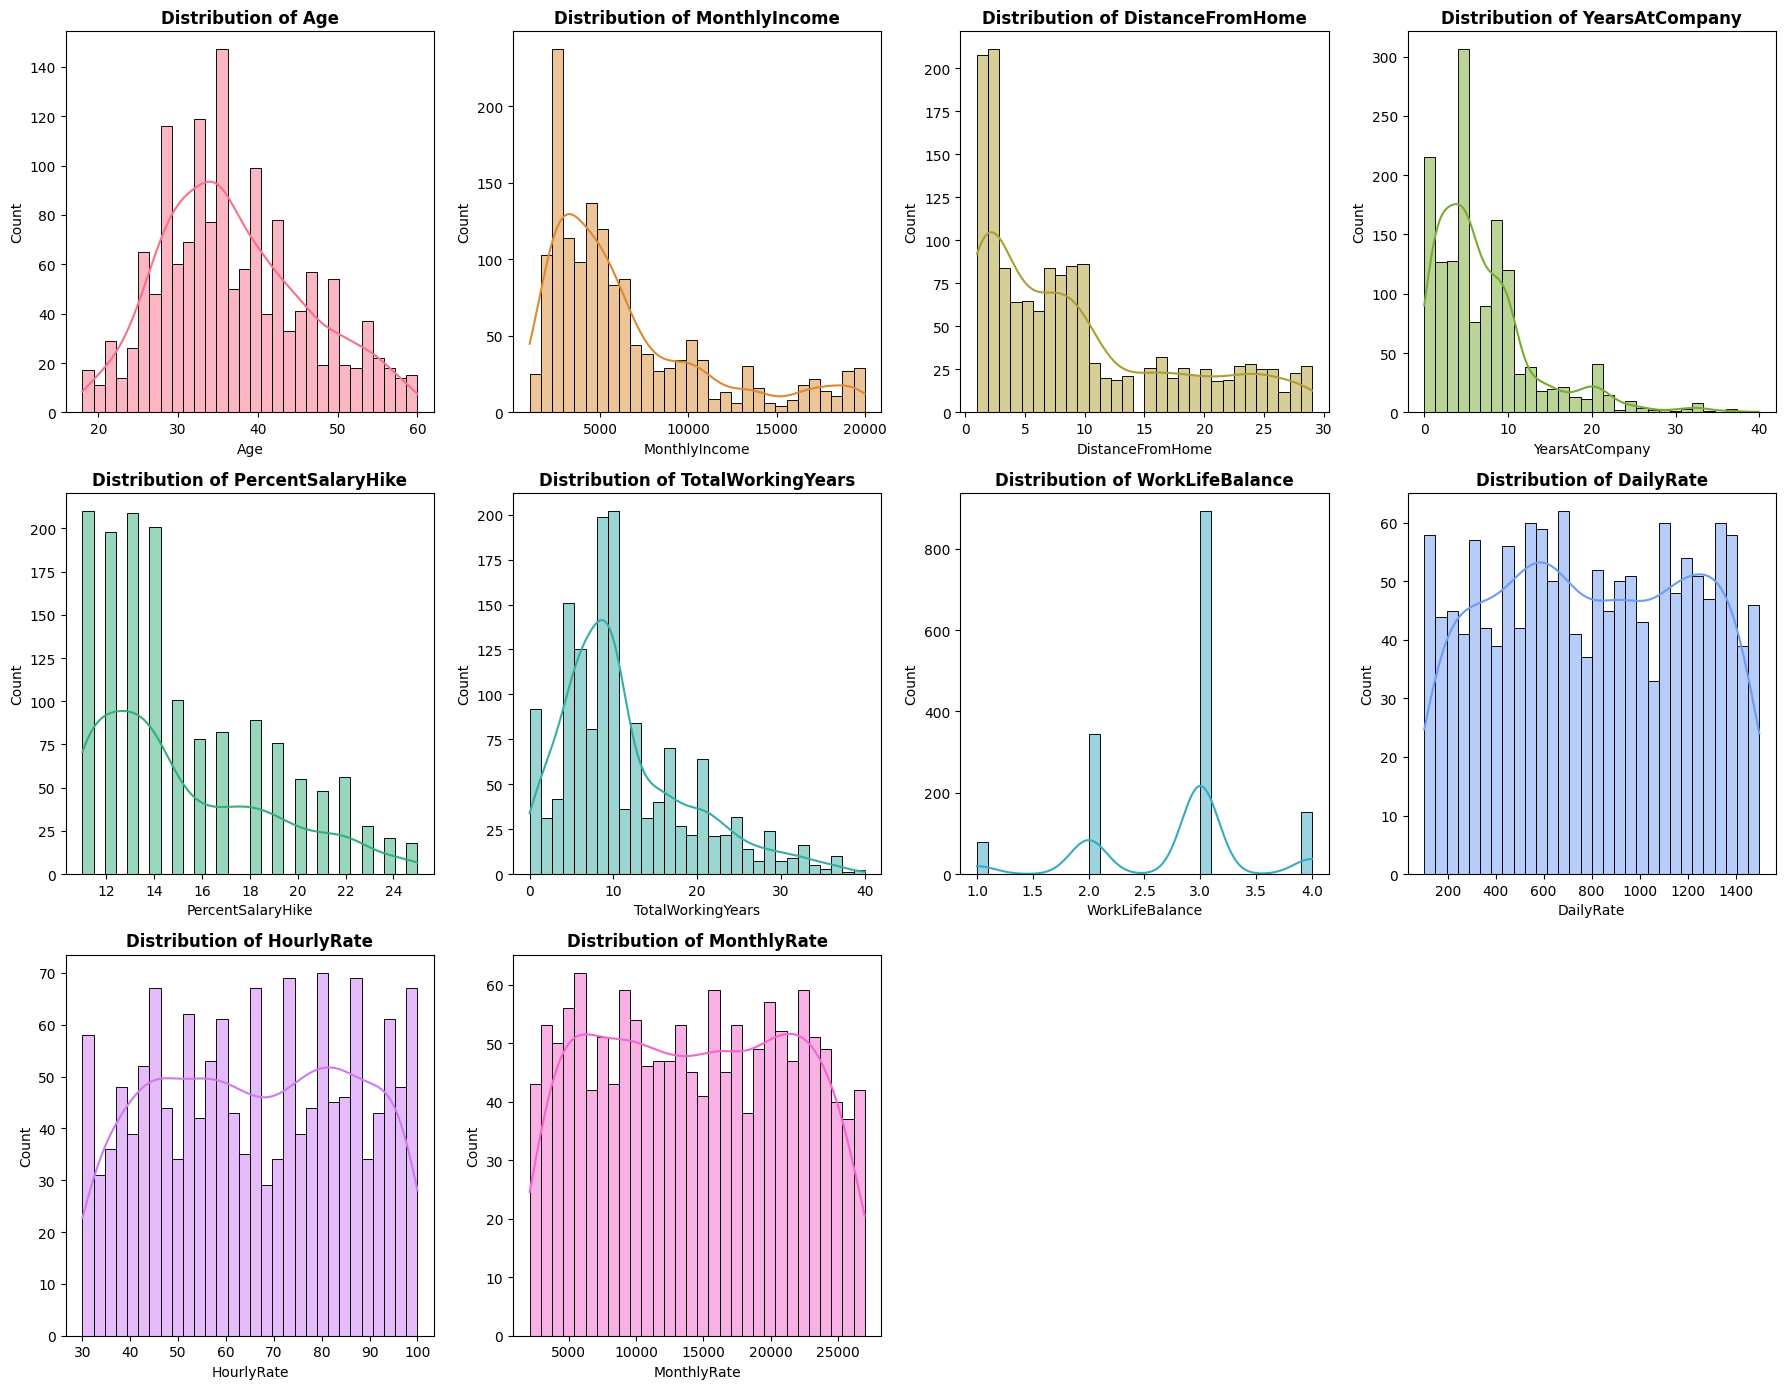

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous (numerical) features
continuous_features = [
    'Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 
    'PercentSalaryHike', 'TotalWorkingYears', 'WorkLifeBalance',
      'DailyRate', 'HourlyRate', 'MonthlyRate'
]

# Define color palette
colors = sns.color_palette("husl", len(continuous_features))

# Determine grid size (4x4 for up to 16 features)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


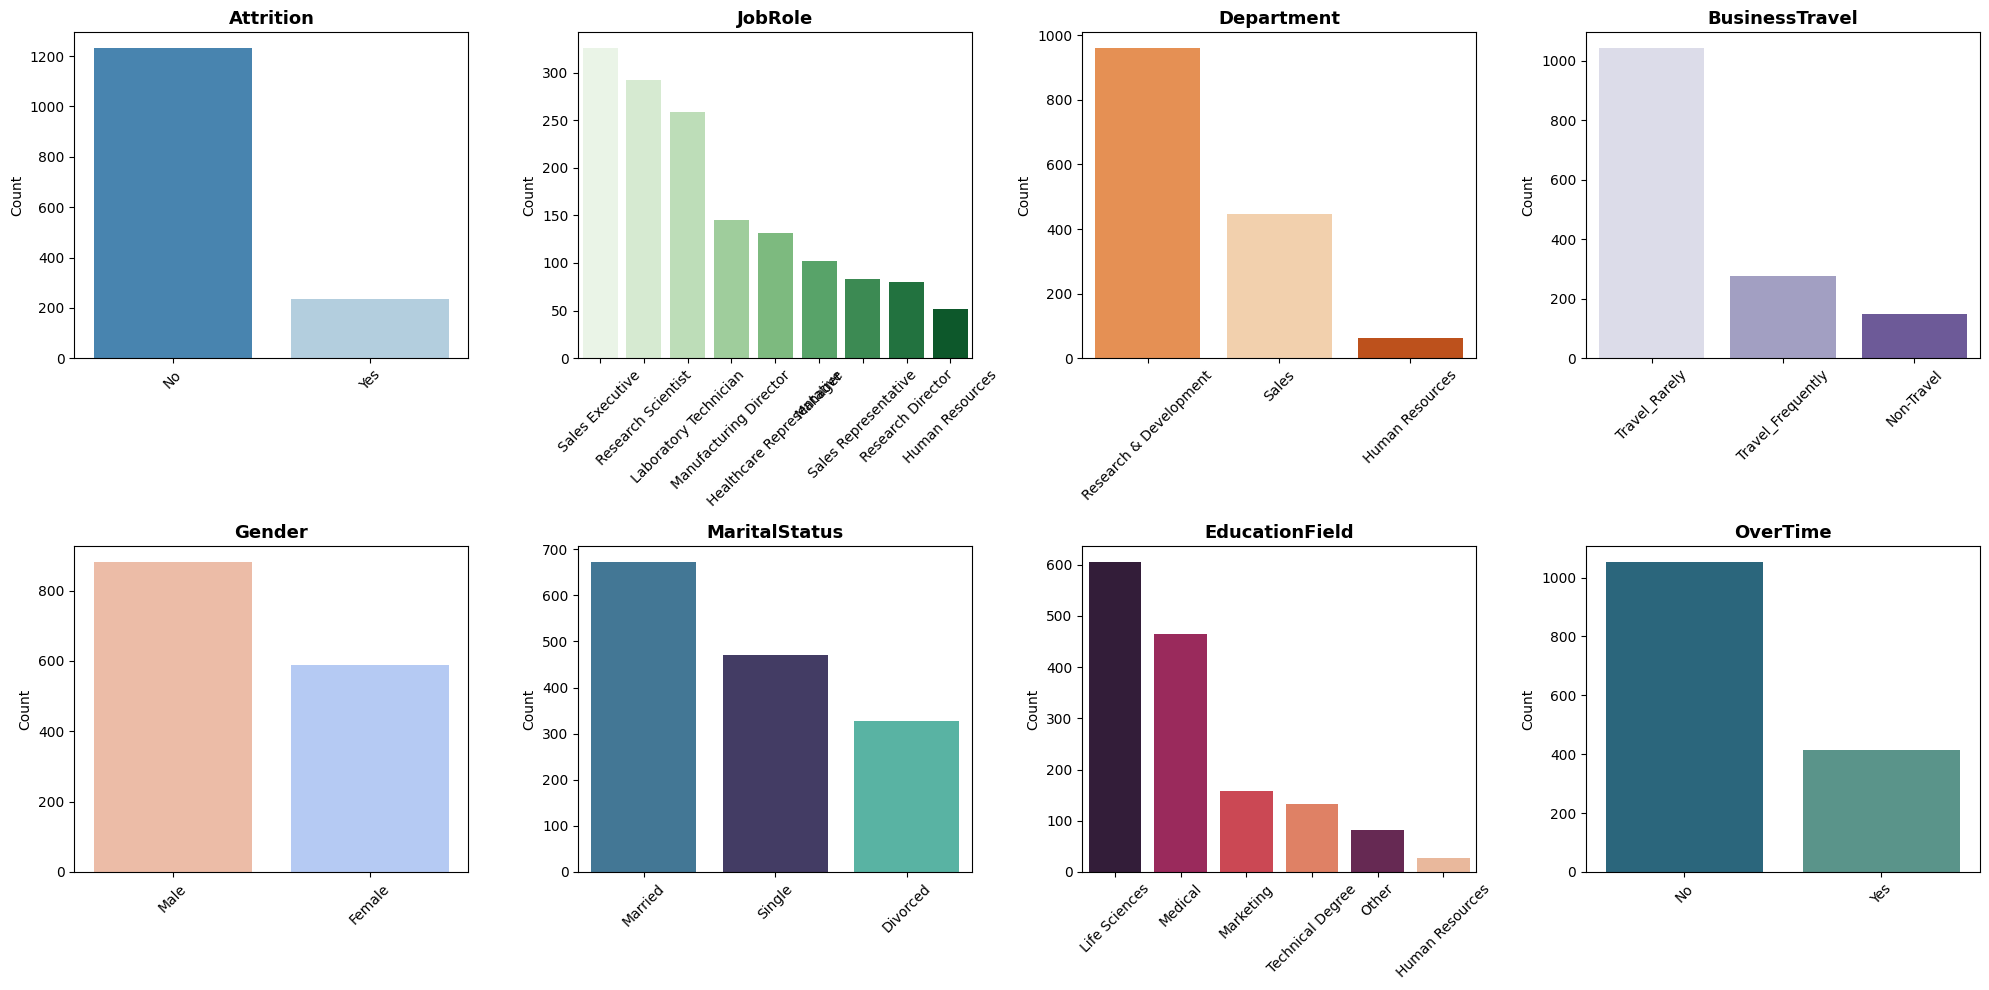

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = ['Attrition', 'JobRole', 'Department', 'BusinessTravel',
                        'Gender', 'MaritalStatus', 'EducationField', 'OverTime']

# Define color palettes
palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'coolwarm',
            'mako', 'rocket', 'crest']

# Create a 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through features and assign each to a subplot
for i, (feature, palette) in enumerate(zip(categorical_features, palettes)):
    sns.countplot(
        data=df,
        x=feature,
        hue=feature,
        order=df[feature].value_counts().index,
        palette=palette,
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f'{feature}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


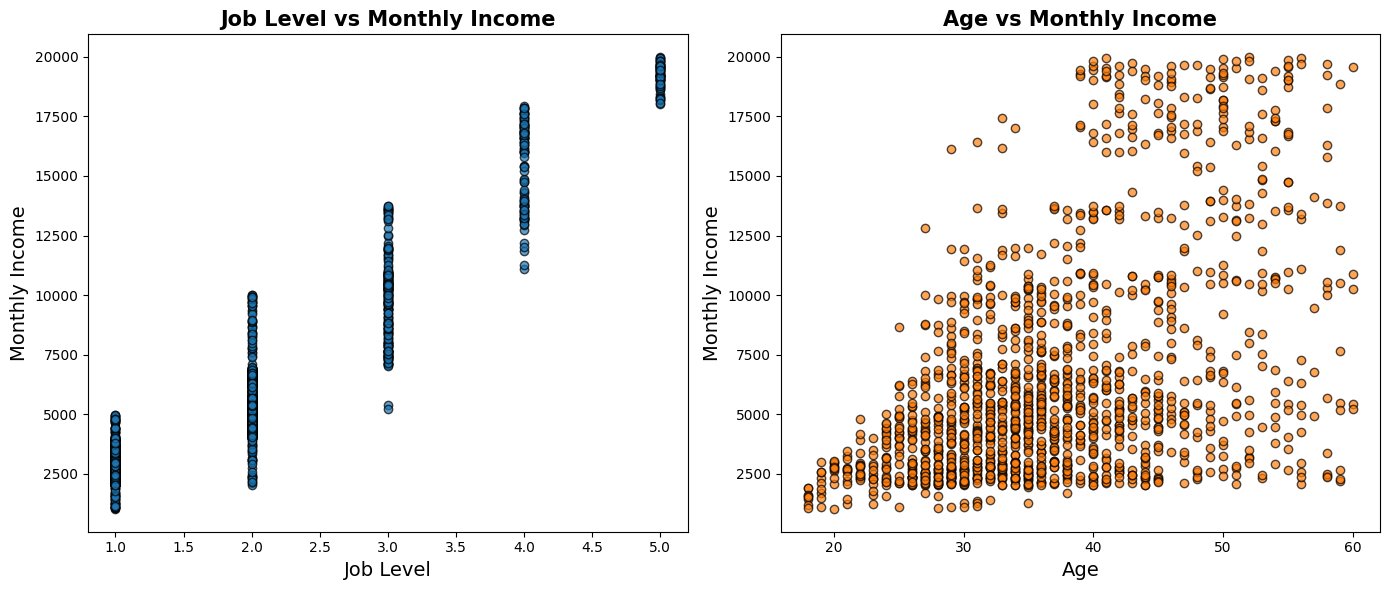

In [23]:
# Comparison of JobLevel and Age  vs MonthlyIncome

# Create a 1x2 grid for the scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Plot 1: JobLevel vs MonthlyIncome
axes[0].scatter(df["JobLevel"], df["MonthlyIncome"], color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_xlabel("Job Level", fontsize=14)
axes[0].set_ylabel("Monthly Income", fontsize=14)
axes[0].set_title("Job Level vs Monthly Income", fontsize=15, fontweight='bold')

# Plot 2: Age vs MonthlyIncome
axes[1].scatter(df["Age"], df["MonthlyIncome"], color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_xlabel("Age", fontsize=14)
axes[1].set_ylabel("Monthly Income", fontsize=14)
axes[1].set_title("Age vs Monthly Income", fontsize=15, fontweight='bold')

# Layout adjustment
plt.tight_layout()
plt.show()


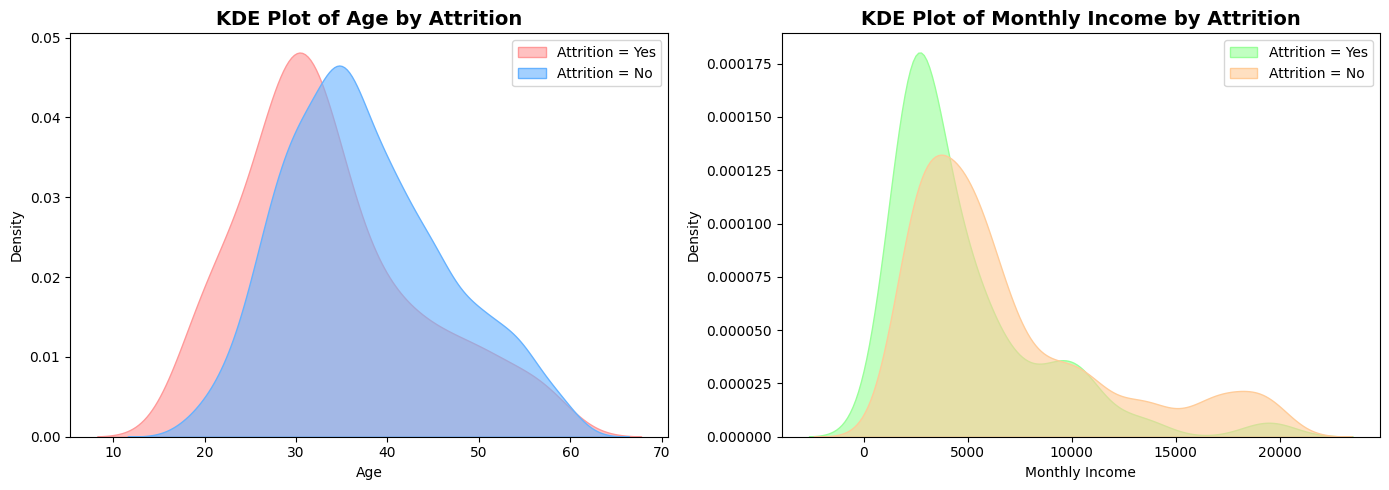

In [24]:
# Comparison of Age and MonthlyIncome  vs Attrition

# Set up the figure grid
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define distinct color palettes for each subplot
palette1 = ['#FF9999', '#66B2FF']
palette2 = ['#99FF99', '#FFCC99']

# --- Plot 1: Age vs Attrition ---
sns.kdeplot(
    data=df[df['Attrition'] == 'Yes'], x='Age', fill=True, ax=axes[0],
    label='Attrition = Yes', color=palette1[0], alpha=0.6
)
sns.kdeplot(
    data=df[df['Attrition'] == 'No'], x='Age', fill=True, ax=axes[0],
    label='Attrition = No', color=palette1[1], alpha=0.6
)
axes[0].set_title('KDE Plot of Age by Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].legend()

# --- Plot 2: MonthlyIncome vs Attrition ---
sns.kdeplot(
    data=df[df['Attrition'] == 'Yes'], x='MonthlyIncome', fill=True, ax=axes[1],
    label='Attrition = Yes', color=palette2[0], alpha=0.6
)
sns.kdeplot(
    data=df[df['Attrition'] == 'No'], x='MonthlyIncome', fill=True, ax=axes[1],
    label='Attrition = No', color=palette2[1], alpha=0.6
)
axes[1].set_title('KDE Plot of Monthly Income by Attrition', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Monthly Income')
axes[1].set_ylabel('Density')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


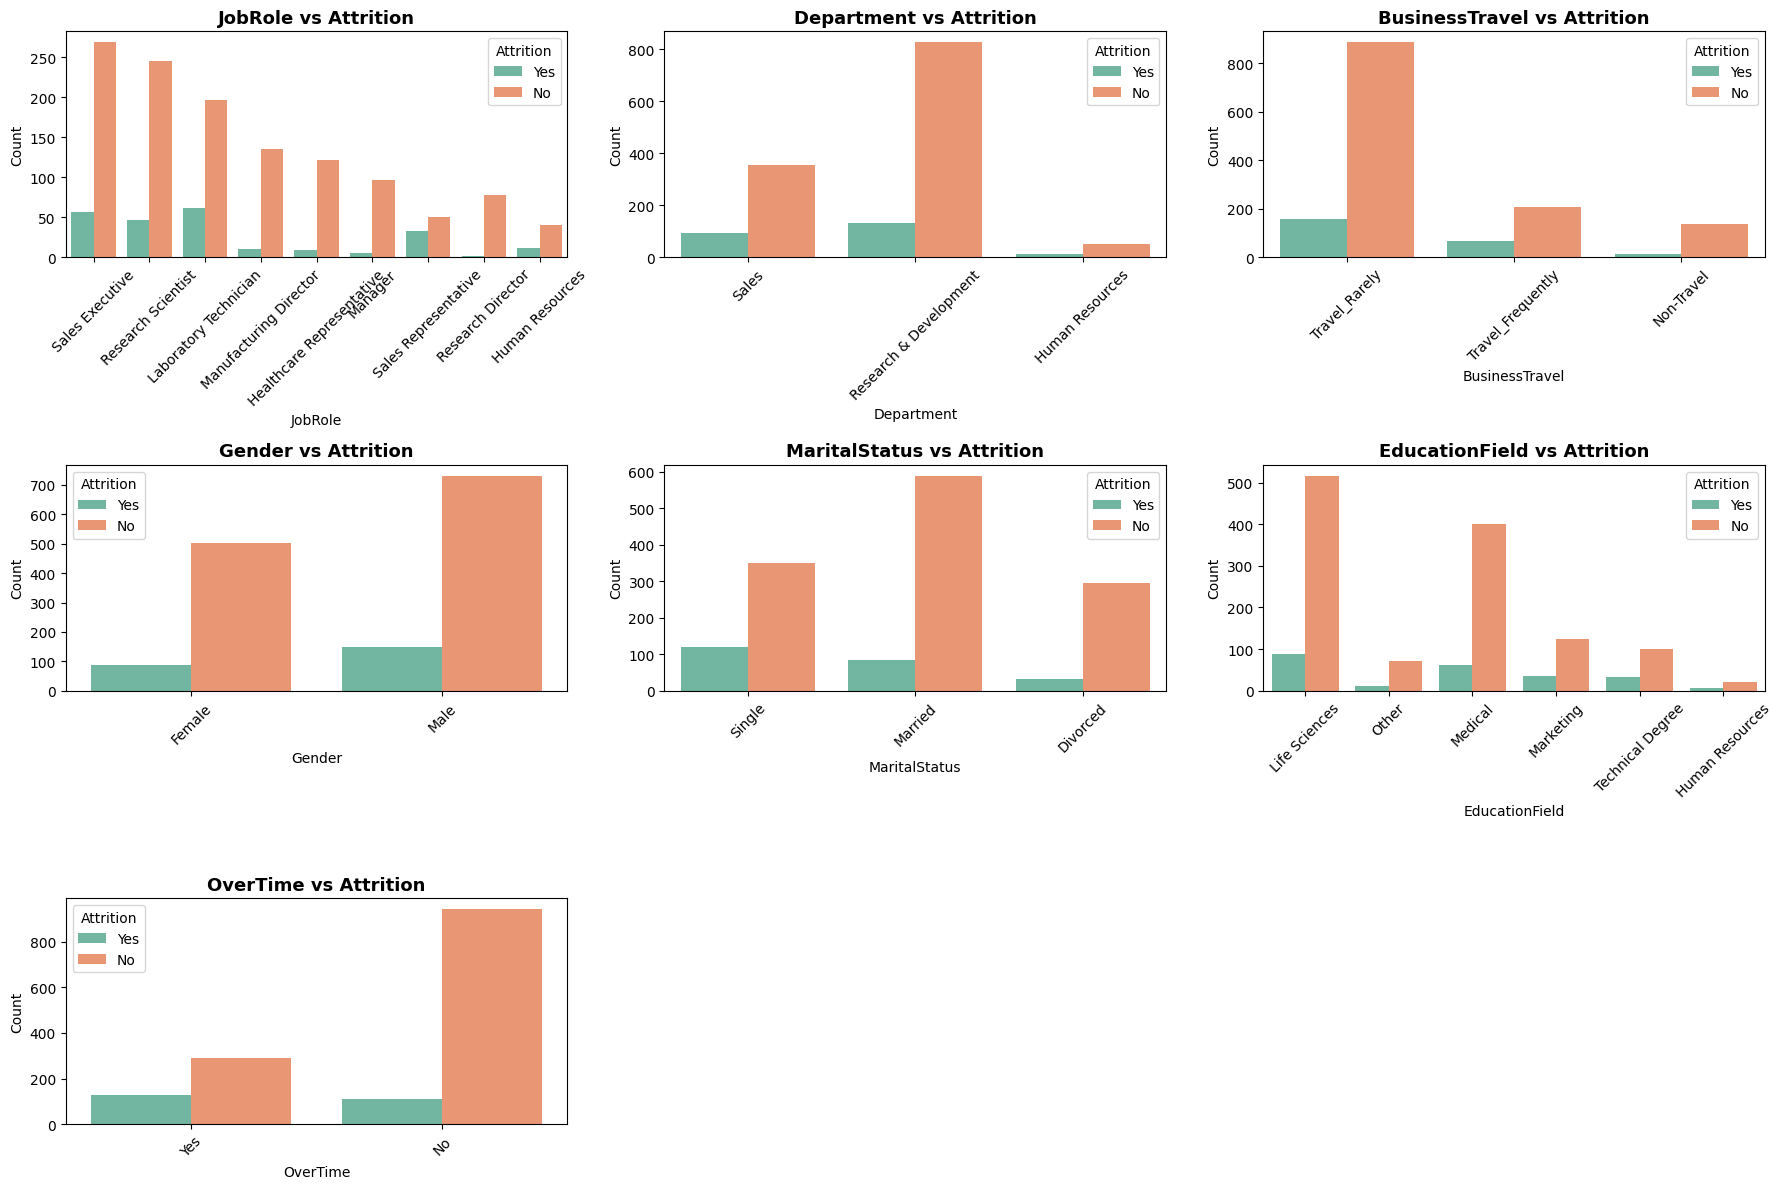

In [25]:
#Categorical features vs Attrition

# Categorical features
cat_cols = ['JobRole', 'Department', 'BusinessTravel',
            'Gender', 'MaritalStatus', 'EducationField', 'OverTime']

# Define number of rows and columns for subplots
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

# Set color palette
palette = sns.color_palette("husl", len(cat_cols))

# Loop through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Attrition', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Attrition', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Attrition')

# Remove empty subplots if any
for j in range(len(cat_cols), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


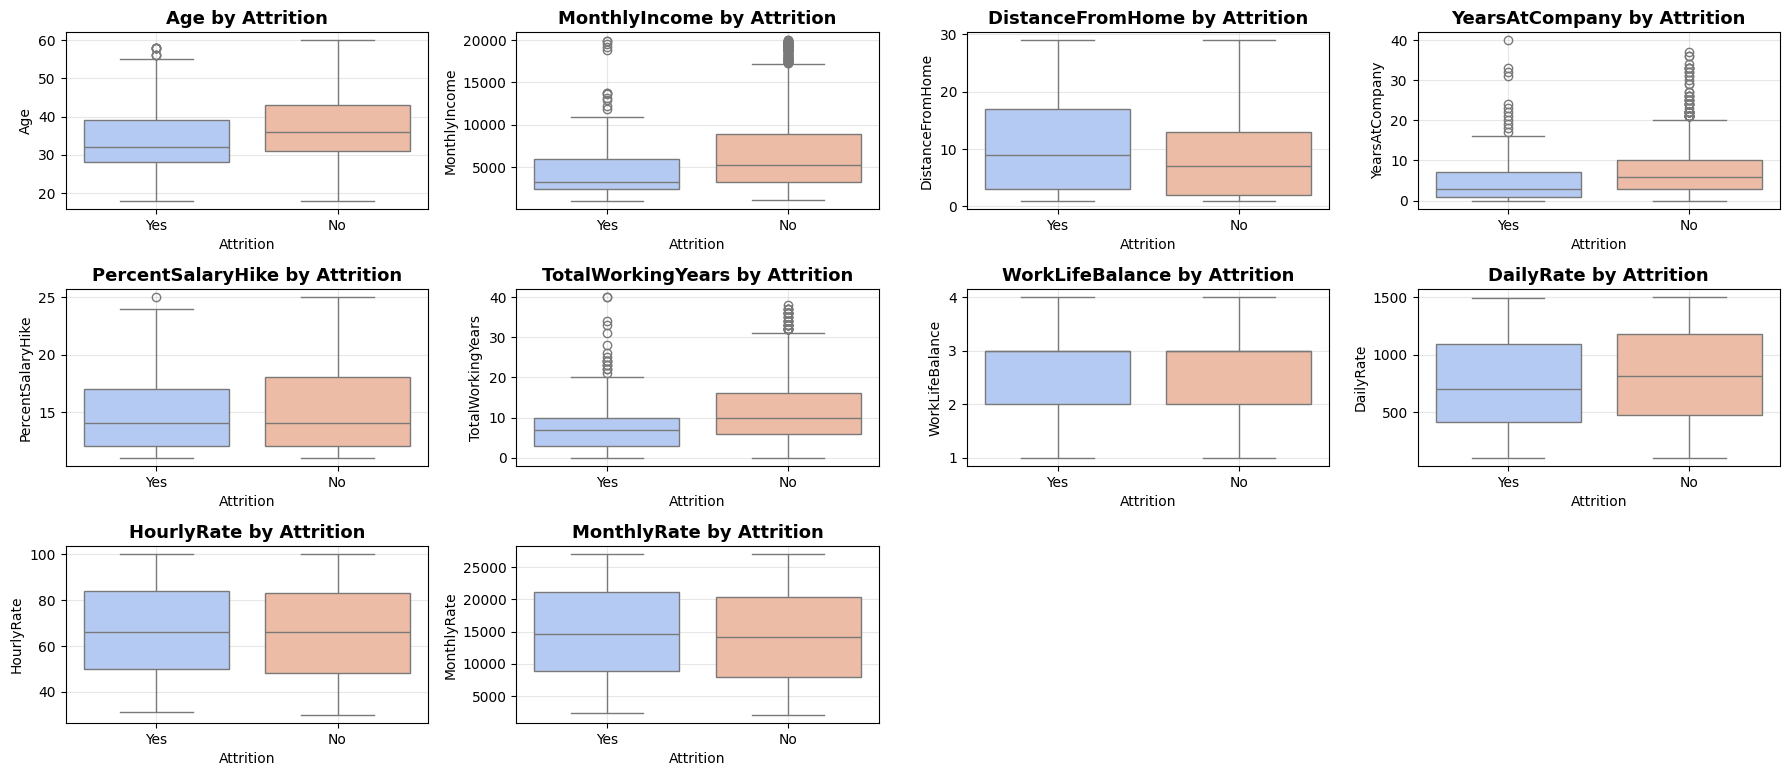

In [26]:
#Numerical features vs Attrition

# Numerical features
num_cols = [
    'Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 
    'PercentSalaryHike', 'TotalWorkingYears', 'WorkLifeBalance',
      'DailyRate', 'HourlyRate', 'MonthlyRate'
    ]

# Define grid layout
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

# Use a color palette
palette = sns.color_palette("Set2", len(num_cols))

# Loop through numerical columns
for i, col in enumerate(num_cols):
    sns.boxplot(x='Attrition', y=col, hue='Attrition', data=df,
                ax=axes[i], palette='coolwarm', dodge=False, legend=False)
    axes[i].set_title(f'{col} by Attrition', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)


# Remove any unused subplots
for j in range(len(num_cols), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


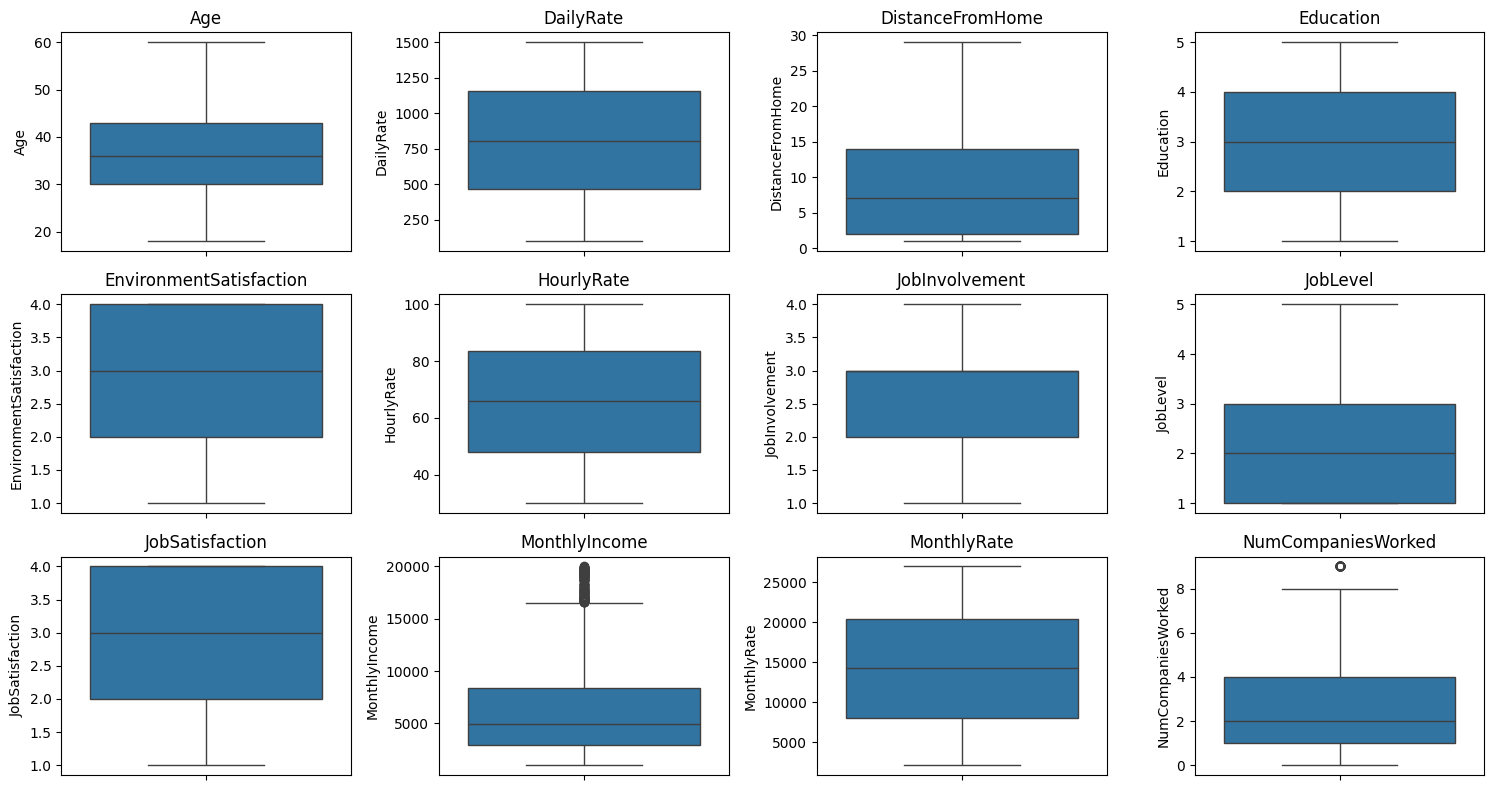

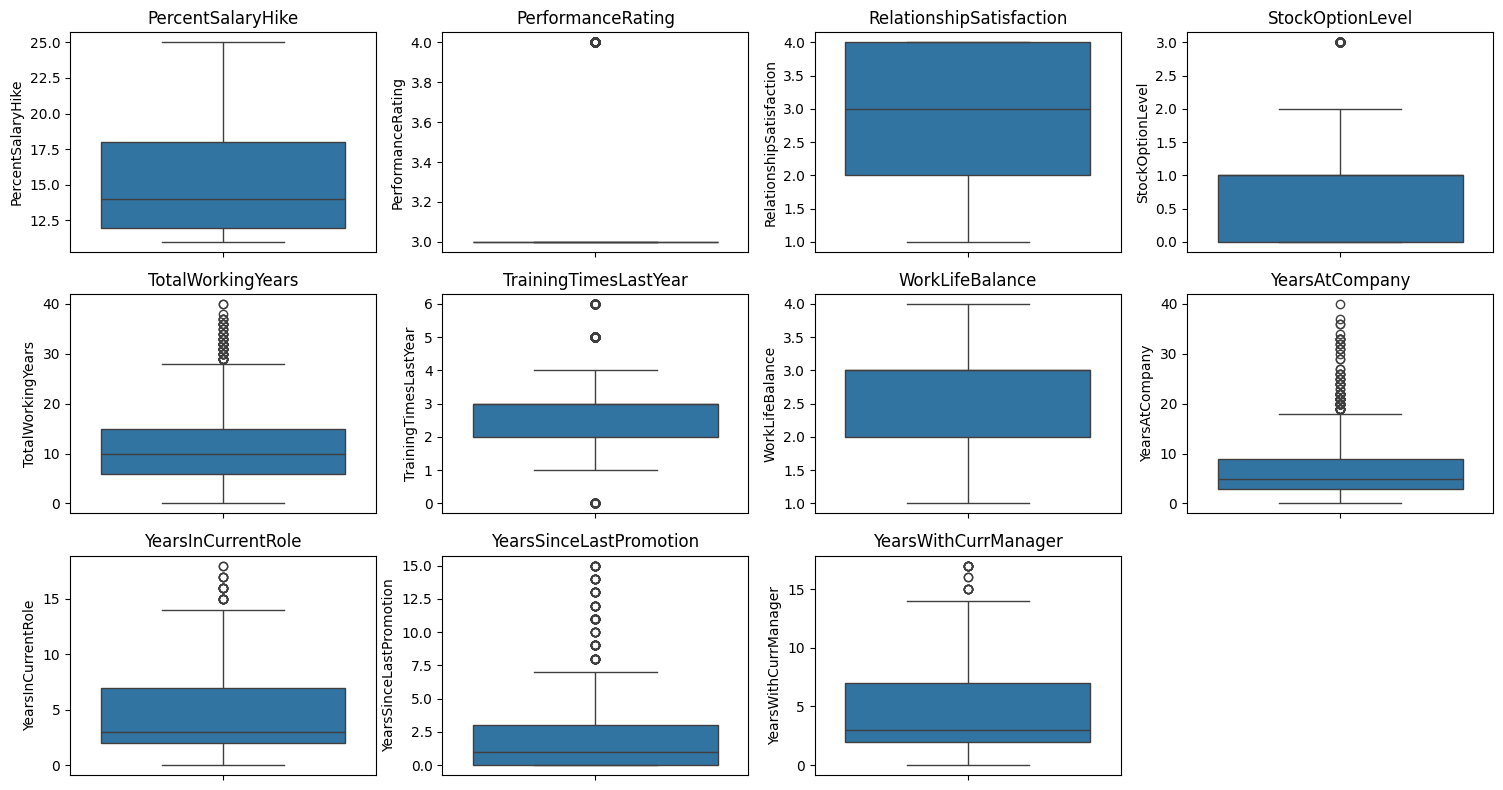

In [27]:
import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numerical_cols)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numerical_cols[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

In [28]:
# Detecting outliers

cols_to_check = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

outlier_summary = {}

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': len(outliers)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


                         Lower_Bound  Upper_Bound  Num_Outliers
MonthlyIncome                -5291.0      16581.0         114.0
TotalWorkingYears               -7.5         28.5          63.0
YearsAtCompany                  -6.0         18.0         104.0
YearsInCurrentRole              -5.5         14.5          21.0
YearsSinceLastPromotion         -4.5          7.5         107.0
YearsWithCurrManager            -5.5         14.5          14.0


In [29]:
#Cap the Outliers

cols_to_cap = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
               'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(upper=upper_bound)


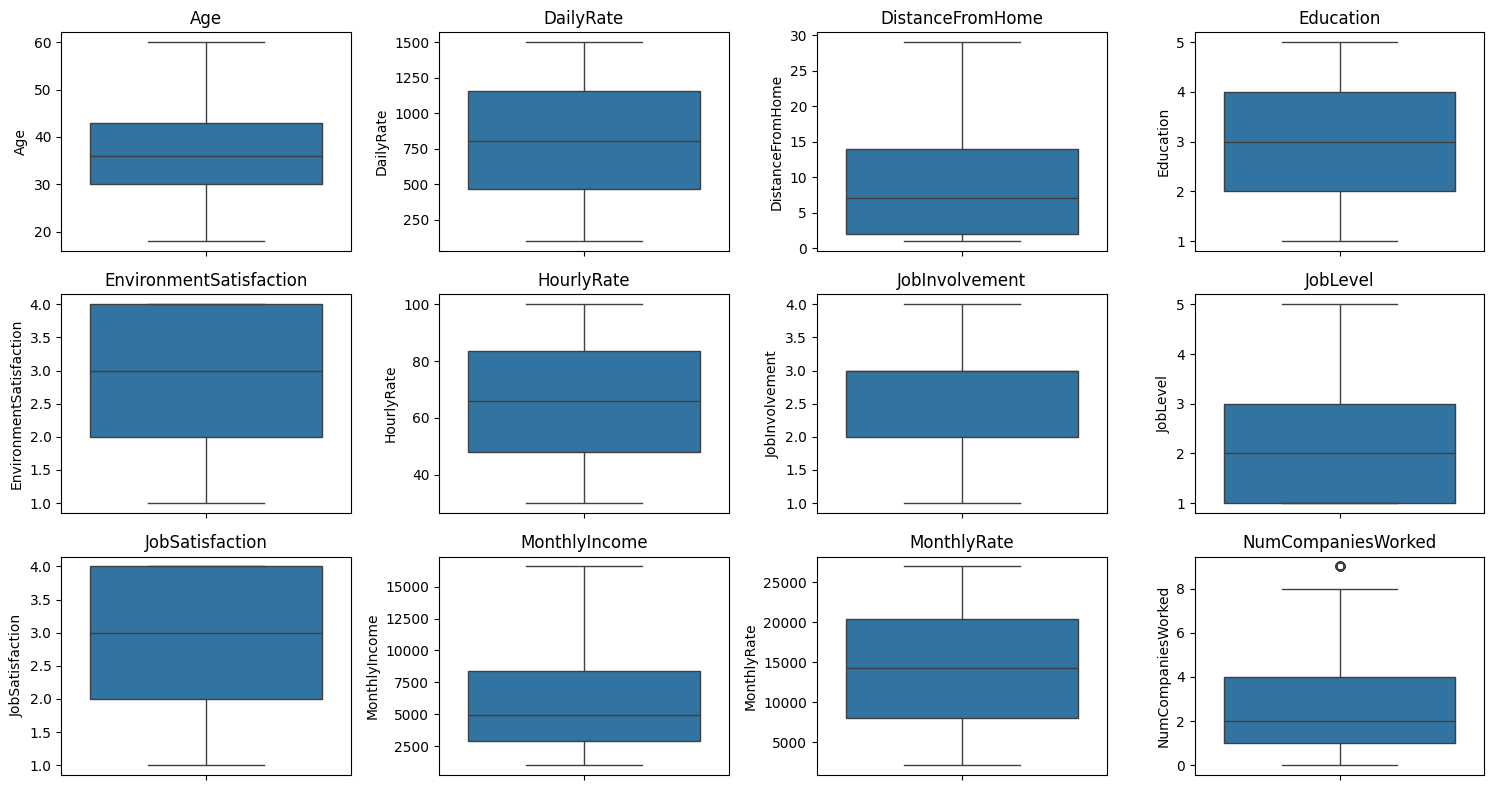

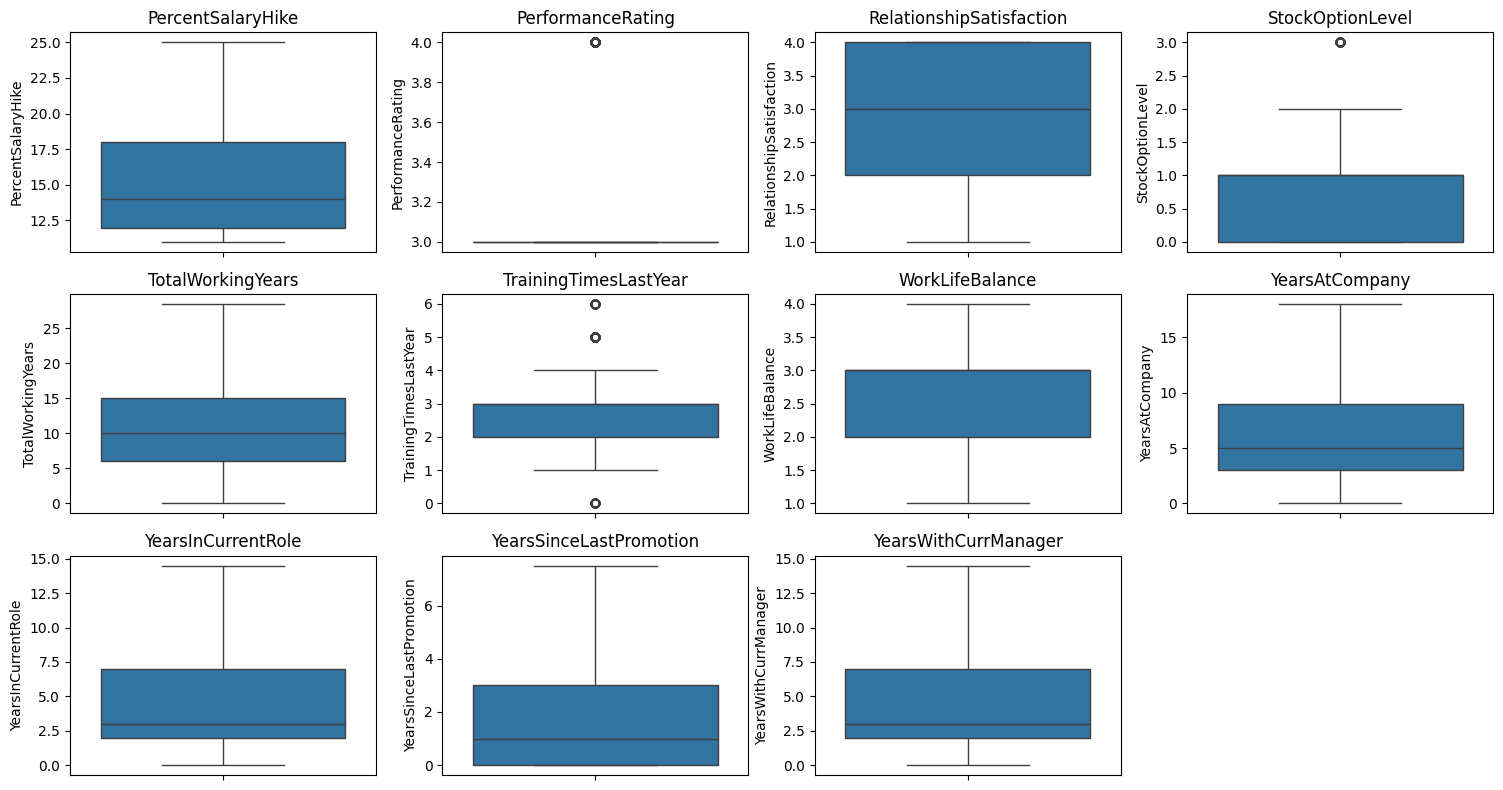

In [30]:
import math

# Batch size (number of plots per page)
batch_size = 12
total_cols = len(numerical_cols)
num_batches = math.ceil(total_cols / batch_size)

# Plot in batches
for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    cols_to_plot = numerical_cols[start:end]

    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

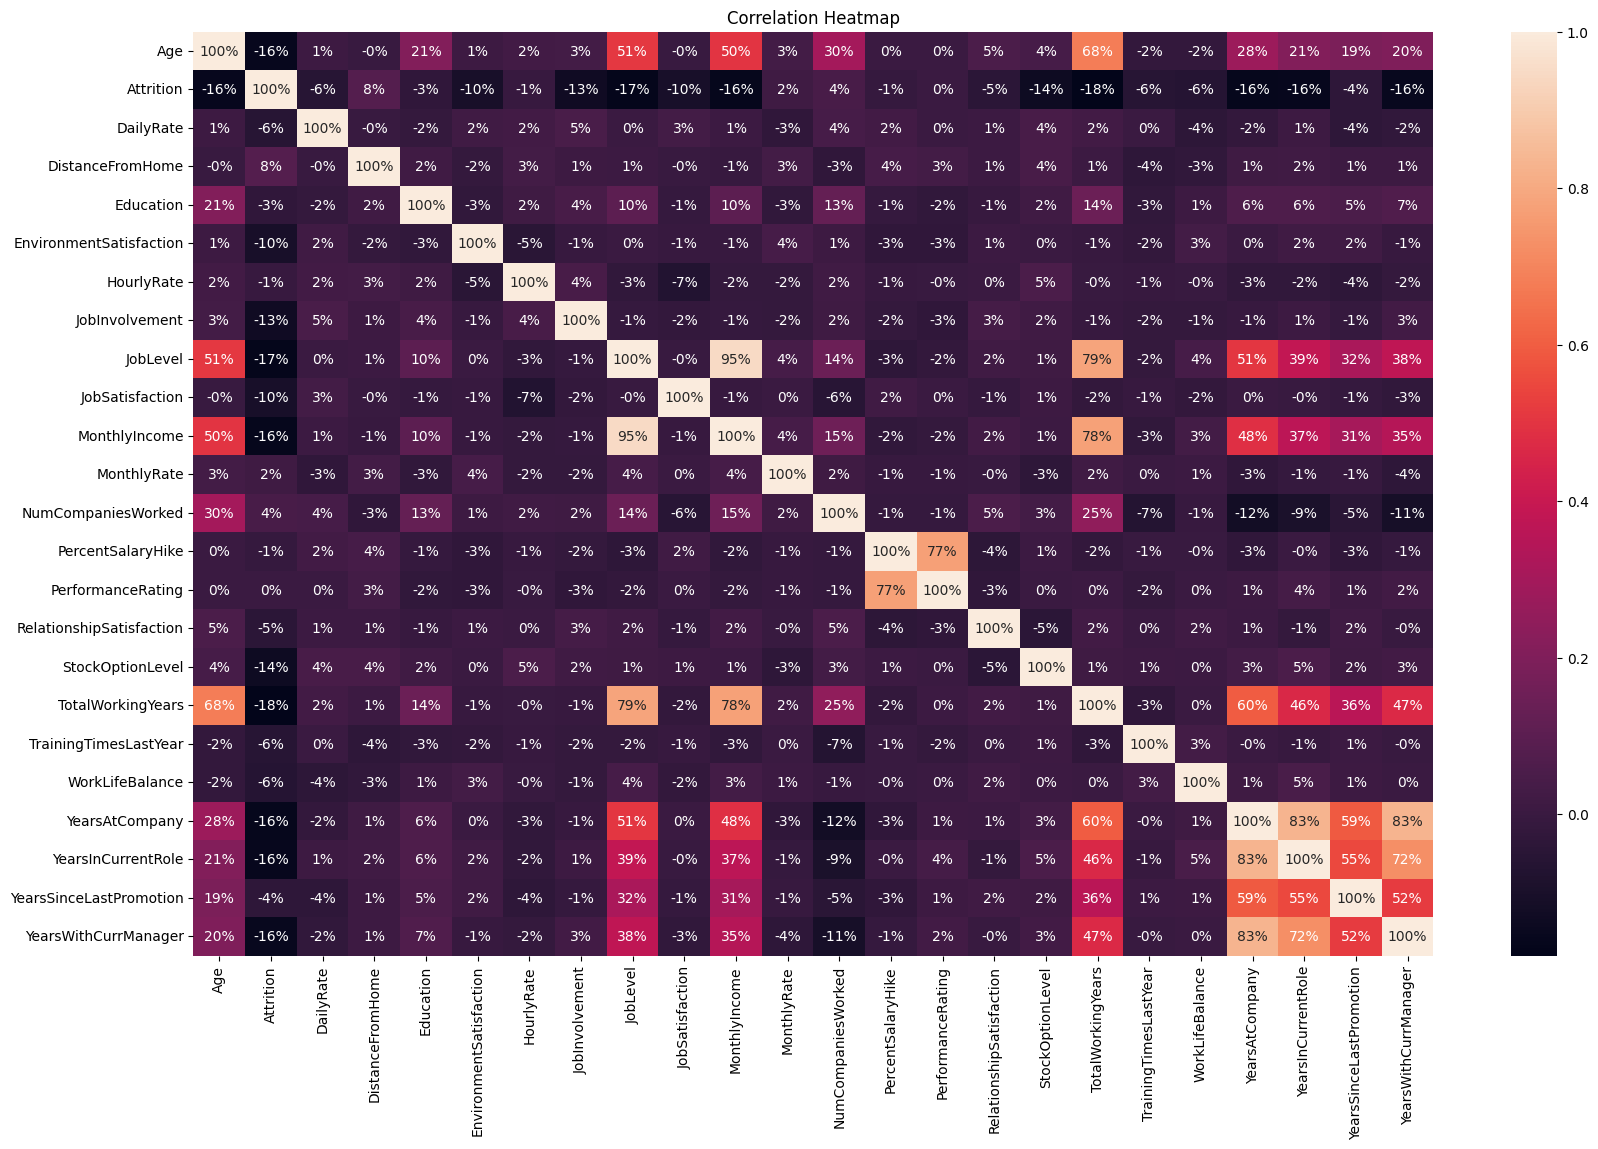

Correlation of features with Attrition:
Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.037486
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156498
Age                        -0.159205
YearsInCurrentRole         -0.161484
YearsAtCompany             -0.162211
MonthlyIncome              -0.164778
JobLevel                   -0.169105
TotalWorkingYears          -0.180628
Name: Attrition, dtype: float64


In [31]:
# Convert Attrition to numeric for correlation
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

corr = df.corr(numeric_only=True)

df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(20,12))
sns.heatmap(df_numeric.corr(),annot=True,fmt='.0%')
plt.title('Correlation Heatmap')
plt.show()

# Show features most correlated with Attrition
print("Correlation of features with Attrition:")
print(corr['Attrition'].sort_values(ascending=False))



In [32]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [33]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [34]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [35]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [36]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [37]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [38]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [39]:
df['Attrition'].unique()

array([1, 0])

In [40]:
df['Attrition'].nunique()

2

In [41]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

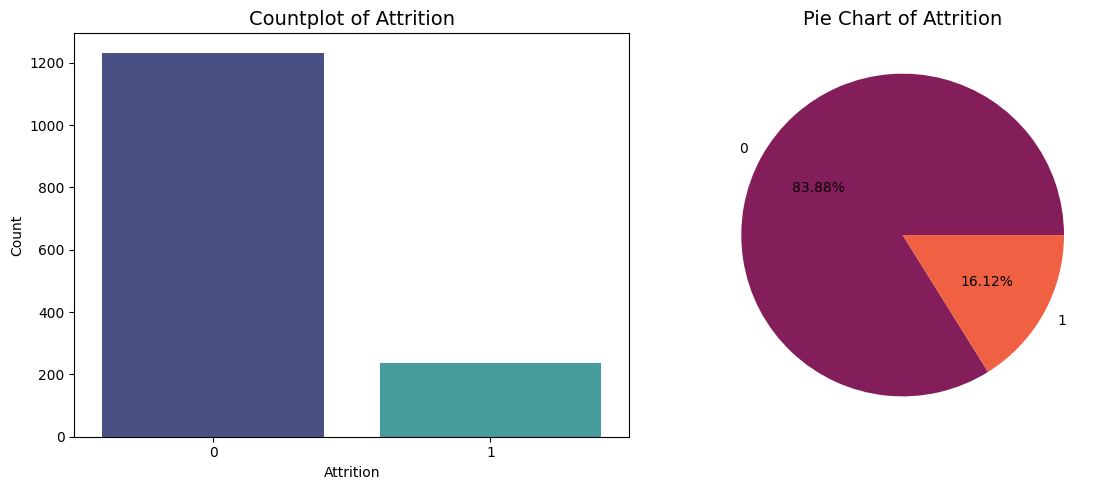

In [42]:
# Countplot and Piechart for Attrition 

categorical_cols = ['Attrition']  # you can add more categorical columns here
palettes = ['mako', 'rocket', 'crest', 'viridis', 'coolwarm']  # new palette choices

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Countplot with a new color from palette
count_colors = sns.color_palette(palettes[0], n_colors=df['Attrition'].nunique())
sns.countplot(
    x='Attrition',
    hue='Attrition',  # explicitly assign hue
    data=df,
    palette='mako',
    legend=False,     # optional, hides duplicate legend
    ax=axes[0]
)

axes[0].set_title('Countplot of Attrition', fontsize=14)
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Count')

# Pie chart with a different palette
pie_colors = sns.color_palette(palettes[1], n_colors=df['Attrition'].nunique())
df['Attrition'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    colors=pie_colors,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title('Pie Chart of Attrition', fontsize=14)

plt.tight_layout()
plt.show()


In [43]:
df.to_csv('D:/GUVI/project3/employee_attrition_cleaned.csv', index=False)


#### Machine learning model development

##### 1. Predicting Employee Attrition

Goal: Predict whether an employee will leave the company (attrition).

Target Variable: Attrition


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
# ---------------------------
df = pd.read_csv('D:/GUVI/project3/employee_attrition_cleaned.csv')

In [3]:
# Feature & target
# ---------------------------
Feature_Names = [
    'OverTime', 'JobSatisfaction', 'MonthlyIncome','Age', 
    'YearsAtCompany',  'MaritalStatus', 'NumCompaniesWorked',  'DistanceFromHome', 
]

X = df[Feature_Names].copy()
y = df['Attrition']

In [4]:
# Automatically detect numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Automatically detect categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [5]:
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Preprocessor
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# ---------------------------
# Imbalanced sampler
# ---------------------------
sampler = SMOTETomek(random_state=42)

# ---------------------------
# Classifier
# ---------------------------
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)


In [7]:
# Pipeline: preprocessor -> sampler -> classifier
# ---------------------------
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', clf)
])

In [8]:
# Fit pipeline
# ---------------------------
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['JobSatisfaction',
                                                   'MonthlyIncome', 'Age',
                                                   'YearsAtCompany',
                                                   'NumCompaniesWorked',
                                                   'DistanceFromHome']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['OverTime',
                                                   'MaritalStatus'])])),
                ('sampler', SMOTETomek(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=12,
                                        n_estimators=200, random_state=42))])

In [9]:
# Evaluate
# ---------------------------
y_pred = pipeline.predict(X_test)

# applying sigmoid probability
y_prob=pipeline.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted_No', 'Predicted_Yes'],
            yticklabels=['Actual_No', 'Actual_Yes'])
plt.title("Confusion Matrix - Attrition Prediction")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Accuracy: 0.8299319727891157

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.46      0.38      0.42        47

    accuracy                           0.83       294
   macro avg       0.67      0.65      0.66       294
weighted avg       0.82      0.83      0.82       294



NameError: name 'plt' is not defined

In [ ]:

from sklearn.metrics import (roc_curve, auc)
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

#  AUROC
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc:.4f}")

AUROC: 0.7675


In [10]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

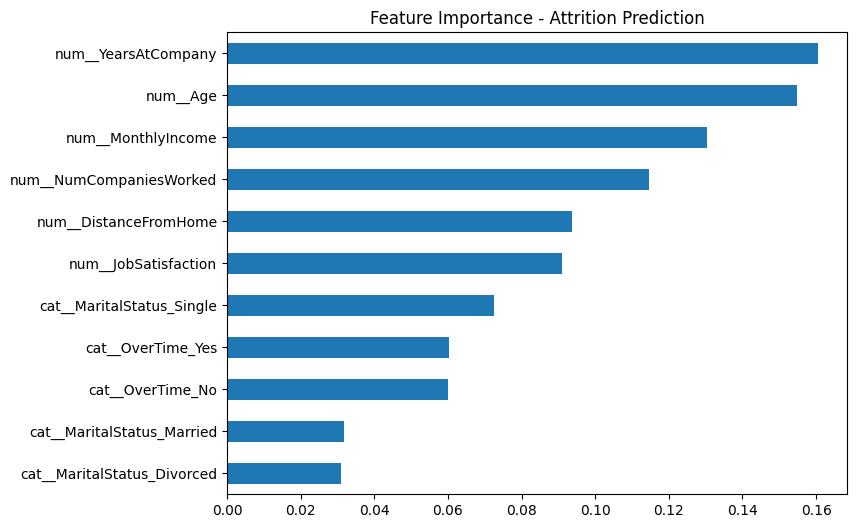

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get actual feature names from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Now get feature importances from the classifier
importances = pipeline.named_steps['classifier'].feature_importances_

# Create Series safely
feat_importance = pd.Series(importances, index=feature_names)

# Plot
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance - Attrition Prediction')
plt.show()


In [12]:
import joblib
import numpy as np

# ---------------------------
# 1) Save pipeline
# ---------------------------
save_dict = {
    'pipeline': pipeline,
    'feature_names': Feature_Names,
    'numeric_features': numeric_features,
    'categorical_features': categorical_features
}

joblib.dump(save_dict, "employee_attrition_pipeline.joblib")
print("Pipeline saved to 'employee_attrition_pipeline.joblib'")


Pipeline saved to 'employee_attrition_pipeline.joblib'


In [13]:
loaded = joblib.load("employee_attrition_pipeline.joblib")
pipe = loaded['pipeline']
features = loaded['feature_names']

# Predict example
sample = pd.DataFrame([{
    'OverTime': 'Yes',
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'Age': 29,
    'YearsAtCompany': 3,
    'MaritalStatus': 'Single',
    'NumCompaniesWorked': '4',
    'DistanceFromHome': 8
}])

# Predict class
pred_class = pipe.predict(sample)[0]

# Predict probability (for each class: 0 = No, 1 = Yes)
pred_proba = pipe.predict_proba(sample)[0]  # array([prob_No, prob_Yes])

# Print detailed result
print("----- Employee Attrition Prediction -----")
print(f"Predicted Attrition: {'Yes' if pred_class == 1 else 'No'}")
print(f"Probability of Attrition (Yes): {pred_proba[1]*100:.2f}%")
print(f"Probability of Staying (No): {pred_proba[0]*100:.2f}%")
print("\nEmployee Details:")
for col in sample.columns:
    print(f"  {col}: {sample[col].values[0]}")

----- Employee Attrition Prediction -----
Predicted Attrition: Yes
Probability of Attrition (Yes): 76.63%
Probability of Staying (No): 23.37%

Employee Details:
  OverTime: Yes
  JobSatisfaction: 3
  MonthlyIncome: 5000
  Age: 29
  YearsAtCompany: 3
  MaritalStatus: Single
  NumCompaniesWorked: 4
  DistanceFromHome: 8
